## Seaborn

* Мы создадим визуализацию с помощью библиотеки Seaborn: посмотрим динамику коммитов в расчете на пользователя.

#### 1. Подключаемся к базе

In [35]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect('../data/checking-logs.sqlite')

#### 2. Загрузка данных 

In [36]:
query_for_df = """
SELECT *
FROM checker
WHERE status='ready' AND labname='project1'
"""

df = pd.read_sql_query(query_for_df, conn)

df.head()

,index,status,success,timestamp,numTrials,labname,uid
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4
1,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4
2,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4
3,13,ready,0,2020-04-17 05:43:27.773992,4,project1,user_4
4,15,ready,1,2020-04-17 05:46:32.275104,5,project1,user_4


#### 3. Обработка данных

In [37]:
df = df.dropna(subset=['uid'])

df = df[df['uid'].str.startswith('user_')]

df['timestamp'] = pd.to_datetime(df['timestamp'])

df = df.sort_values(by=['uid', 'timestamp'])

df['cumulative_commits'] = df.groupby('uid').cumcount() + 1

print(df.head())


     index status  success                  timestamp  numTrials   labname  \
888   3057  ready        0 2020-05-14 20:56:08.898880          1  project1   
889   3059  ready        0 2020-05-14 20:58:02.313690          2  project1   
890   3061  ready        0 2020-05-14 20:58:46.322457          3  project1   
904   3091  ready        0 2020-05-14 21:08:15.434237          4  project1   
905   3093  ready        0 2020-05-14 21:10:14.867603          5  project1   

        uid  cumulative_commits  
888  user_1                   1  
889  user_1                   2  
890  user_1                   3  
904  user_1                   4  
905  user_1                   5  


#### 4. Построение графика

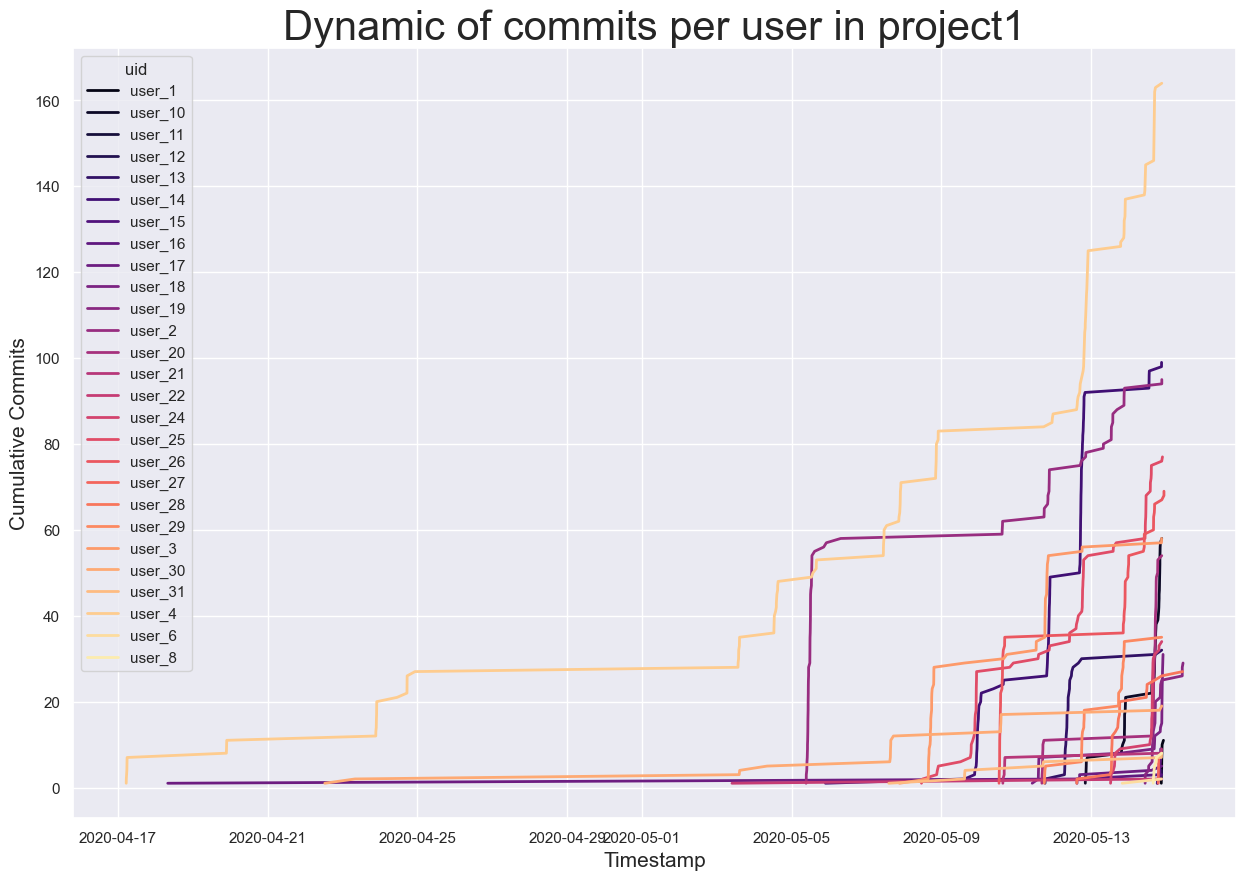

In [47]:
height = 10
width = height * 1.5
sns.set_theme(style='darkgrid')
plt.figure(figsize=(width, height))

g = sns.lineplot(data=df, x='timestamp', y='cumulative_commits', hue='uid', linewidth=2, palette='magma')

g.set_title('Dynamic of commits per user in project1', fontsize=30)
g.set_xlabel('Timestamp', fontsize=15)
g.set_ylabel('Cumulative Commits', fontsize=15)
plt.xticks(rotation=0)

plt.show()

#### 5. Отвечаем на допы:

* “Which user was the leader in the number of commits almost all of the time?”
* “Which user was the leader for only a short period of time?”

In [45]:
print("1. The answer is: user_4.")
print("2. The answer is: user_2.")

1. The answer is: user_4.
2. The answer is: user_2.


#### 6. Для проверки ответа на вопрос:

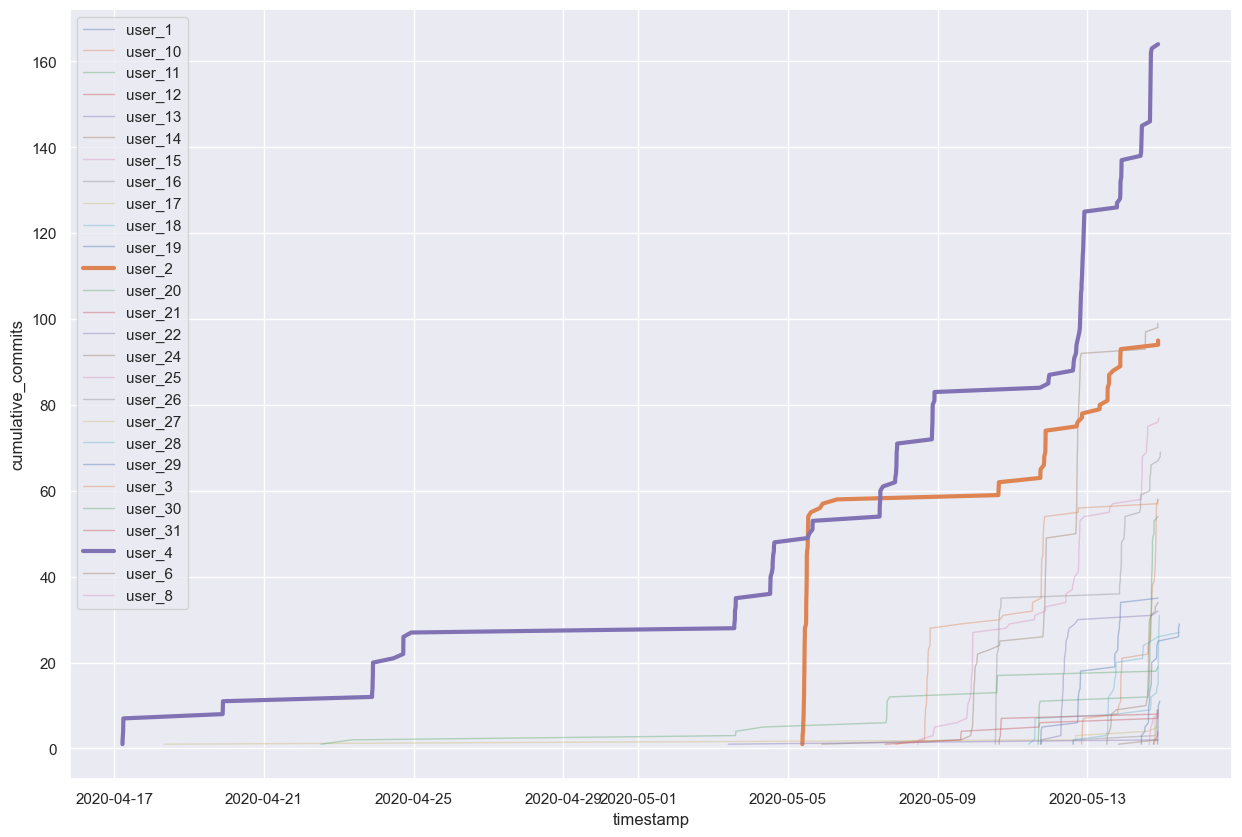

In [49]:
height = 10
width = height * 1.5
sns.set_theme(style='darkgrid')
plt.figure(figsize=(width, height))

highlight_users = ['user_4', 'user_2']

for user in df['uid'].unique():
    subset = df[df['uid'] == user]
    linewidth = 3 if user in highlight_users else 1
    alpha = 1 if user in highlight_users else 0.4
    sns.lineplot(data=subset, x='timestamp', y='cumulative_commits', label=user, linewidth=linewidth, alpha=alpha)

g.set_title('Dynamic of commits per user in project1', fontsize=30)
g.set_xlabel('Timestamp', fontsize=15)
g.set_ylabel('Cumulative Commits', fontsize=15)
plt.xticks(rotation=0)

plt.show()